These are some basic object display examples using vtk. The interactive window is incompatible with notebook and will crash the notebook kernel on exit

In [1]:
import vtk 
from vtk import (vtkSphereSource, vtkPolyDataMapper, vtkActor, vtkRenderer,
        vtkRenderWindow, vtkWindowToImageFilter, vtkPNGWriter)


In [2]:
def vtk_show(renderer, w=100, h=100):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(w, h)
    renderWindow.Render()
     
    windowToImageFilter = vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = memoryview(writer.GetResult()).tobytes()
    
    from IPython.display import Image
    return Image(data)


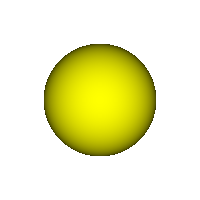

In [4]:
sphereSource = vtkSphereSource()
sphereSource.SetPhiResolution(200)
sphereSource.SetThetaResolution(200)
mapper = vtkPolyDataMapper()
mapper.SetInputConnection(sphereSource.GetOutputPort())
 
actor = vtkActor()
actor.SetMapper(mapper)
actor.GetProperty().SetColor(1,1,0)
 
renderer = vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1)

vtk_show(renderer, 200, 200)

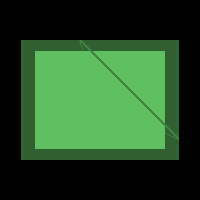

In [5]:
#Create a cube
cube=vtk.vtkCubeSource()
cube.SetXLength(40)
cube.SetYLength(30)
cube.SetZLength(20)
cubeMapper=vtk.vtkPolyDataMapper()
cubeMapper.SetInputConnection(cube.GetOutputPort())
 
#create a plane to cut,here it cuts in the XZ direction (xz normal=(1,0,0);XY =(0,0,1),YZ =(0,1,0)
plane=vtk.vtkPlane()
plane.SetOrigin(10,0,0)
plane.SetNormal(1,1,0)
 
#create cutter
cutter=vtk.vtkCutter()
cutter.SetCutFunction(plane)
cutter.SetInputConnection(cube.GetOutputPort())
cutter.Update()
cutterMapper=vtk.vtkPolyDataMapper()
cutterMapper.SetInputConnection( cutter.GetOutputPort())
 
#create plane actor
planeActor=vtk.vtkActor()
planeActor.GetProperty().SetColor(1.0,1,0)
planeActor.GetProperty().SetLineWidth(2)
planeActor.SetMapper(cutterMapper)
 
#create cube actor
cubeActor=vtk.vtkActor()
cubeActor.GetProperty().SetColor(0.5,1,0.5)
cubeActor.GetProperty().SetOpacity(0.5)
cubeActor.SetMapper(cubeMapper)
 
#create renderers and add actors of plane and cube
ren = vtk.vtkRenderer()
ren.AddActor(planeActor)
ren.AddActor(cubeActor)
ren.SetBackground(0,0,0)

vtk_show(ren, 200, 200)


This code comes from the VTK Book, Chapter 3. 

Note that it displays in a separate window and doesn't terminate properly. It basically hangs Jupyter notebook.


In [4]:
import vtk
colors = vtk.vtkNamedColors()
cone = vtk.vtkConeSource() 
cone.SetHeight( 3.0 ) 
cone.SetRadius( 1.0 ) 
cone.SetResolution( 10 )

coneMapper = vtk.vtkPolyDataMapper() 
coneMapper.SetInputConnection(cone.GetOutputPort())

coneActor = vtk.vtkActor() 
coneActor.SetMapper(coneMapper)

ren1 = vtk.vtkRenderer()
ren1.AddActor(coneActor) 
ren1.SetBackground(colors.GetColor3d('MidnightBlue'))

renWin = vtk.vtkRenderWindow() 
renWin.AddRenderer(ren1) 
renWin.SetSize(300, 300)

iren = vtk.vtkRenderWindowInteractor() 
iren.SetRenderWindow(renWin)

style = vtk.vtkInteractorStyleTrackballCamera() 
iren.SetInteractorStyle(style)
iren.Initialize() 
iren.Start()

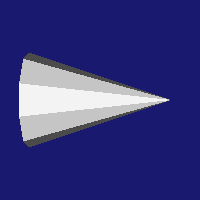

In [3]:
colors = vtk.vtkNamedColors()
cone = vtk.vtkConeSource() 
cone.SetHeight( 3.0 ) 
cone.SetRadius( 1.0 ) 
cone.SetResolution( 10 )

coneMapper = vtk.vtkPolyDataMapper() 
coneMapper.SetInputConnection(cone.GetOutputPort())

coneActor = vtk.vtkActor() 
coneActor.SetMapper(coneMapper)

ren1 = vtk.vtkRenderer()
ren1.AddActor(coneActor) 
ren1.SetBackground(colors.GetColor3d('MidnightBlue'))

vtk_show(ren1, 200, 200)

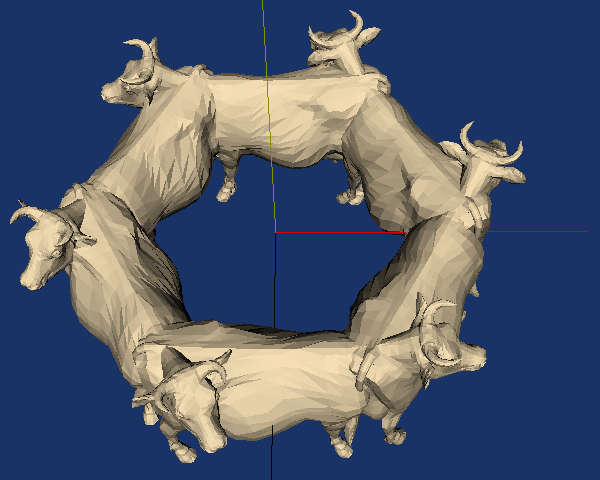

In [8]:
#!/usr/local/bin/python

#  Translated from walkCow.tcl

def walk_cow(file_name, figure):
    figure = abs(figure)
    if figure > 2:
        figure = 0

    colors = vtk.vtkNamedColors()
    # Set the background color.
    colors.SetColor("BkgColor1", [60, 93, 144, 255])
    colors.SetColor("BkgColor2", [26, 51, 102, 255])

    ren = vtk.vtkRenderer()
    renWin = vtk.vtkRenderWindow()
    renWin.AddRenderer(ren)

    iren = vtk.vtkRenderWindowInteractor()
    iren.SetRenderWindow(renWin)

    # The cow pipeline.
    cow = vtk.vtkBYUReader()
    cow.SetGeometryFileName(file_name)
    cow.Update()

    cowMapper = vtk.vtkPolyDataMapper()
    cowMapper.SetInputConnection(cow.GetOutputPort())
    cowMapper.ScalarVisibilityOff()

    cowActor = vtk.vtkActor()
    cowActor.SetMapper(cowMapper)
    cowActor.GetProperty().SetColor(colors.GetColor3d("Wheat"))

    ren.AddActor(cowActor)

    # Axes pipeline.
    cowAxesSource = vtk.vtkAxes()
    cowAxesSource.SetScaleFactor(10.0)
    cowAxesSource.SetOrigin(0, 0, 0)

    cowAxesMapper = vtk.vtkPolyDataMapper()
    cowAxesMapper.SetInputConnection(cowAxesSource.GetOutputPort())

    cowAxes = vtk.vtkActor()
    cowAxes.SetMapper(cowAxesMapper)
    cowAxes.VisibilityOff()

    ren.AddActor(cowAxes)

    ren.SetBackground(colors.GetColor3d("BkgColor1"))
    renWin.SetSize(600, 480)

    cowAxes.VisibilityOn()
    renWin.Render()

    # Activate this if you want to see the Position and Focal point.
    # ren.GetActiveCamera().AddObserver('ModifiedEvent', CameraModifiedCallback)

    # These four walks use the same camera position.
    Rotate_X(cowActor, ren, renWin)
    Rotate_Y(cowActor, ren, renWin)
    Rotate_Z(cowActor, ren, renWin)
    Rotate_XY(cowActor, ren, renWin)

    ren.SetBackground(colors.GetColor3d("BkgColor2"))
    if figure == 1:
        Rotate_V_0(cowActor, ren, renWin)
    elif figure == 2:
        Rotate_V_V(cowActor, ren, renWin)
    else:
        Rotate_V_0(cowActor, ren, renWin)
        Rotate_V_V(cowActor, ren, renWin)
        # Walk() needs to go after Rotate_V_0() or Rotate_V_V().
        Walk(cowActor, ren, renWin)

    # Interact with data.
    renWin.EraseOff()
     
    windowToImageFilter = vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renWin)
    windowToImageFilter.Update()
     
    writer = vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = memoryview(writer.GetResult()).tobytes()
    
    from IPython.display import Image
    return Image(data)


"""
  These Rotate* and Walk functions create a scene where multiple
     views of the object exist.

    They all operate in a similar manner, namely:
    1) Accept vtkActor, vtkRenderer, vtkRenderWindow as parameters.
    2) Position the object.
    3) Position the observer with the focal point sent to the centre
        of the object.
    4) Render and set EraseOff() in the render window.
       Note that:
        EraseOff() has to be called after a Render() call
         to work in the desired way.
    5) Then rotate or Walk the object around the scene.
    6) Optionally write out the scene using Screenshot().
    6) Set EraseOff() in the render window.
    7) Reset the object position.

"""


def Rotate_X(cowActor, ren, renWin):
    # Six rotations about the x axis.
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    # This closely matches the original illustration.
    ren.GetActiveCamera().SetPosition(2, 25, 0)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.GetActiveCamera().SetViewUp(0, 0, -1)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(0, 6):
        cowActor.RotateX(60)
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-31a.png", renWin)
    renWin.EraseOn()


def Rotate_Y(cowActor, ren, renWin):
    # Six rotations about the y axis.
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    # This closely matches the original illustration.
    ren.GetActiveCamera().SetPosition(2, 0, 25)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.GetActiveCamera().SetViewUp(0, 1, 0)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(0, 6):
        cowActor.RotateY(60)
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-31b.png", renWin)
    renWin.EraseOn()


def Rotate_Z(cowActor, ren, renWin):
    # Six rotations about the z axis.
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    # This closely matches the original illustration.
    # ren.GetActiveCamera().SetPosition(2, 0, 25)
    ren.GetActiveCamera().SetPosition(2, 0, 25)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.GetActiveCamera().SetViewUp(0, 1, 0)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(0, 6):
        cowActor.RotateZ(60)
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-31c.png", renWin)
    renWin.EraseOn()


def Rotate_XY(cowActor, ren, renWin):
    # First a rotation about the x axis, then six rotations about the y axis.
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    # This closely matches the original illustration.
    # ren.GetActiveCamera().SetPosition(2, 0, 24)
    ren.GetActiveCamera().SetPosition(2, 0, 25)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.GetActiveCamera().SetViewUp(0, 1, 0)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    cowActor.RotateX(60)
    for idx in range(0, 6):
        cowActor.RotateY(60)
        renWin.Render()
        renWin.Render()
    cowActor.RotateX(-60)
    # Screenshot("Fig3-31d.png", renWin)
    renWin.EraseOn()


def Rotate_V_0(cowActor, ren, renWin):
    # The cow rotating about a vector passing through her nose.
    # With the origin at (0, 0, 0).
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    cowPos = vtk.vtkTransform()
    cowPos.Identity()
    cowPos.SetMatrix(cowActor.GetMatrix())
    cowTransform = vtk.vtkTransform()
    cowTransform.Identity()
    cowActor.SetUserMatrix(cowTransform.GetMatrix())
    # This closely matches the original illustration.
    ren.GetActiveCamera().SetPosition(16, 9, -12)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(0, 6):
        cowActor.RotateWXYZ(60, 2.19574, -1.42455, -0.0331036)
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-33a.png", renWin)
    renWin.EraseOn()
    # Put the cow back on the origin.
    # for idx in range(0, 6):
    #     cowActor.RotateWXYZ(-60, 2.19574, -1.42455, -0.0331036)
    # cowActor.SetUserMatrix(cowPos.GetMatrix())
    # ren.GetActiveCamera().SetPosition(0, 0, 1)
    # ren.GetActiveCamera().SetViewUp(0, 1, 0)
    # ren.ResetCamera()


def Rotate_V_V(cowActor, ren, renWin):
    # The cow rotating about a vector passing through her nose.
    # With the origin at (6.11414, 1.27386, 0.015175).
    ren.ResetCamera()
    ren.ResetCameraClippingRange()
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0)
    cowActor.SetPosition(0, 0, 0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    cowPos = vtk.vtkTransform()
    cowPos.Identity()
    cowPos.SetMatrix(cowActor.GetMatrix())
    cowActor.SetOrigin(6.11414, 1.27386, 0.015175)  # The cow's nose
    cowTransform = vtk.vtkTransform()
    cowTransform.Identity()
    cowActor.SetUserMatrix(cowTransform.GetMatrix())
    # This closely matches the original illustration.
    ren.GetActiveCamera().SetPosition(31, 23, -21)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(0, 6):
        cowActor.RotateWXYZ(60, 2.19574, -1.42455, -0.0331036)
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-33b.png", renWin)
    renWin.EraseOn()
    # Put the cow back on the origin.
    # for idx in range(0, 6):
    #     cowActor.RotateWXYZ(-60, 2.19574, -1.42455, -0.0331036)
    # cowActor.SetUserMatrix(cowPos.GetMatrix())


def Walk(cowActor, ren, renWin):
    # The cow "walking" around the global origin
    cowPos = vtk.vtkTransform()
    cowPos.Identity()
    cowPos.SetMatrix(cowActor.GetMatrix())
    cowActor.SetOrientation(0.0, 0.0, 0.0)
    cowActor.SetOrigin(0.0, 0.0, 0.0)
    # Get the focal point.
    bounds = cowActor.GetBounds()
    fp = [0.0] * 3
    for i in range(0, 3):
        fp[i] = (bounds[i * 2 + 1] + bounds[i * 2]) / 2.0
    cowTransform = vtk.vtkTransform()
    cowTransform.Identity()
    cowTransform.Translate(0, 0, 5)
    cowActor.SetUserMatrix(cowTransform.GetMatrix())
    # This closely matches the original illustration.
    ren.GetActiveCamera().SetPosition(1, 24, 16)
    ren.GetActiveCamera().SetFocalPoint(fp)
    ren.GetActiveCamera().SetViewUp(0, 0, -1)
    ren.ResetCameraClippingRange()
    renWin.Render()
    renWin.Render()
    renWin.EraseOff()
    for idx in range(1, 7):
        cowTransform.Identity()
        cowTransform.RotateY(idx * 60)
        cowTransform.Translate(0, 0, 5)
        cowActor.SetUserMatrix(cowTransform.GetMatrix())
        renWin.Render()
        renWin.Render()
    # Screenshot("Fig3-32.png", renWin)
    renWin.EraseOn()
    # Walkies are over, put the cow back on the origin.
    # cowActor.SetUserMatrix(cowPos.GetMatrix())


def CameraModifiedCallback(caller, ev):
    """
     Used to estimate positions similar to the book illustrations.
    :param caller:
    :return:
    """
    print(caller.GetClassName(), "modified")
    # Print the interesting stuff.
    print("\tPosition: ",
          caller.GetPosition()[0], ", ",
          caller.GetPosition()[1], ", ",
          caller.GetPosition()[2])
    print("\tFocal point: ",
          caller.GetFocalPoint()[0], ", ",
          caller.GetFocalPoint()[1], ", ",
          caller.GetFocalPoint()[2])


def Screenshot(fileName, renWin):
    """
    Save a screenshot.
    :param fileName:
    :param renWin:
    :return:
    """
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renWin)
    windowToImageFilter.SetScale(1)  # image quality
    # We are not recording the alpha (transparency) channel.
    # windowToImageFilter.SetInputBufferTypeToRGBA()
    windowToImageFilter.SetInputBufferTypeToRGB()
    # Read from the front buffer.
    windowToImageFilter.ReadFrontBufferOff()
    windowToImageFilter.Update()

    writer = vtk.vtkPNGWriter()
    writer.SetFileName(fileName)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()


file_name = 'cow.g'
figure = 0

walk_cow(file_name, figure)
